In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset
train_data=pd.read_excel('Data_Train.xlsx')
test_data=pd.read_excel('Test_set.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train_data.shape

(10683, 11)

In [6]:
test_data.shape

(2671, 10)

In [7]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
#all are object colums.we have only one neumerical column

In [11]:
#checking for null values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [13]:
#we have only null values in train data and also two colums which has only one null value
#so we can drop the null values

In [14]:
train_data.dropna(inplace=True)

In [15]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
#null values are removed

In [17]:
#checking for duplicate values
train_data[train_data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [18]:
train_data.drop_duplicates(keep='first',inplace=True)

In [19]:
train_data.shape

(10462, 11)

In [20]:
test_data[test_data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info


In [21]:
test_data.drop_duplicates(keep='first',inplace=True)

In [22]:
test_data.shape

(2645, 10)

In [23]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Feature Engineering

#converting date to date time format

In [24]:
train_data['Date_of_Journey']=pd.to_datetime(train_data.Date_of_Journey)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 980.8+ KB


In [26]:
test_data['Date_of_Journey']=pd.to_datetime(test_data.Date_of_Journey)

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2645 non-null   object        
 1   Date_of_Journey  2645 non-null   datetime64[ns]
 2   Source           2645 non-null   object        
 3   Destination      2645 non-null   object        
 4   Route            2645 non-null   object        
 5   Dep_Time         2645 non-null   object        
 6   Arrival_Time     2645 non-null   object        
 7   Duration         2645 non-null   object        
 8   Total_Stops      2645 non-null   object        
 9   Additional_Info  2645 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 227.3+ KB


In [28]:
train_data['Duration']=train_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [29]:
test_data['Duration']=test_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [30]:
#splitting date column into year ,day,month
train_data['journey_Year']= train_data['Date_of_Journey'].dt.year
train_data['journey_day']=train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month


In [31]:
test_data['journey_Year']= test_data['Date_of_Journey'].dt.year
test_data['journey_day']=test_data['Date_of_Journey'].dt.day
test_data['journey_month']=test_data['Date_of_Journey'].dt.month

In [32]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Year,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,2019,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,2019,3,1


In [33]:
#dep time column
train_data['dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

In [34]:
test_data['dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour

In [35]:
train_data['dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [36]:
test_data['dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour

In [37]:
test_data['dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

In [38]:
#we are splitting dep_time column hence dropping the same column
train_data=train_data.drop(['Dep_Time'],axis=1)

In [39]:
test_data=test_data.drop(['Dep_Time'],axis=1)

In [40]:
#dropping date of journey
train_data=train_data.drop(['Date_of_Journey'],axis=1)

In [41]:
test_data=test_data.drop(['Date_of_Journey'],axis=1)

In [42]:
#arrival time column
train_data['arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [43]:
test_data['arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour

In [44]:
train_data['arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [45]:
test_data['arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [46]:
#dropping arrival time column
train_data=train_data.drop(['Arrival_Time'],axis=1)

In [47]:
test_data=test_data.drop(['Arrival_Time'],axis=1)

In [48]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Year,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,2019,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,2019,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,2019,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,2019,3,1,16,50,21,35


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   journey_Year     10462 non-null  int64 
 9   journey_day      10462 non-null  int64 
 10  journey_month    10462 non-null  int64 
 11  dep_hour         10462 non-null  int64 
 12  dep_min          10462 non-null  int64 
 13  arrival_hour     10462 non-null  int64 
 14  arrival_min      10462 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [50]:
train_data=train_data.drop(['Additional_Info'],axis=1)
test_data=test_data.drop(['Additional_Info'],axis=1)

In [51]:
train_data=train_data.drop(['Route'],axis=1)
test_data=test_data.drop(['Route'],axis=1)

<AxesSubplot:>

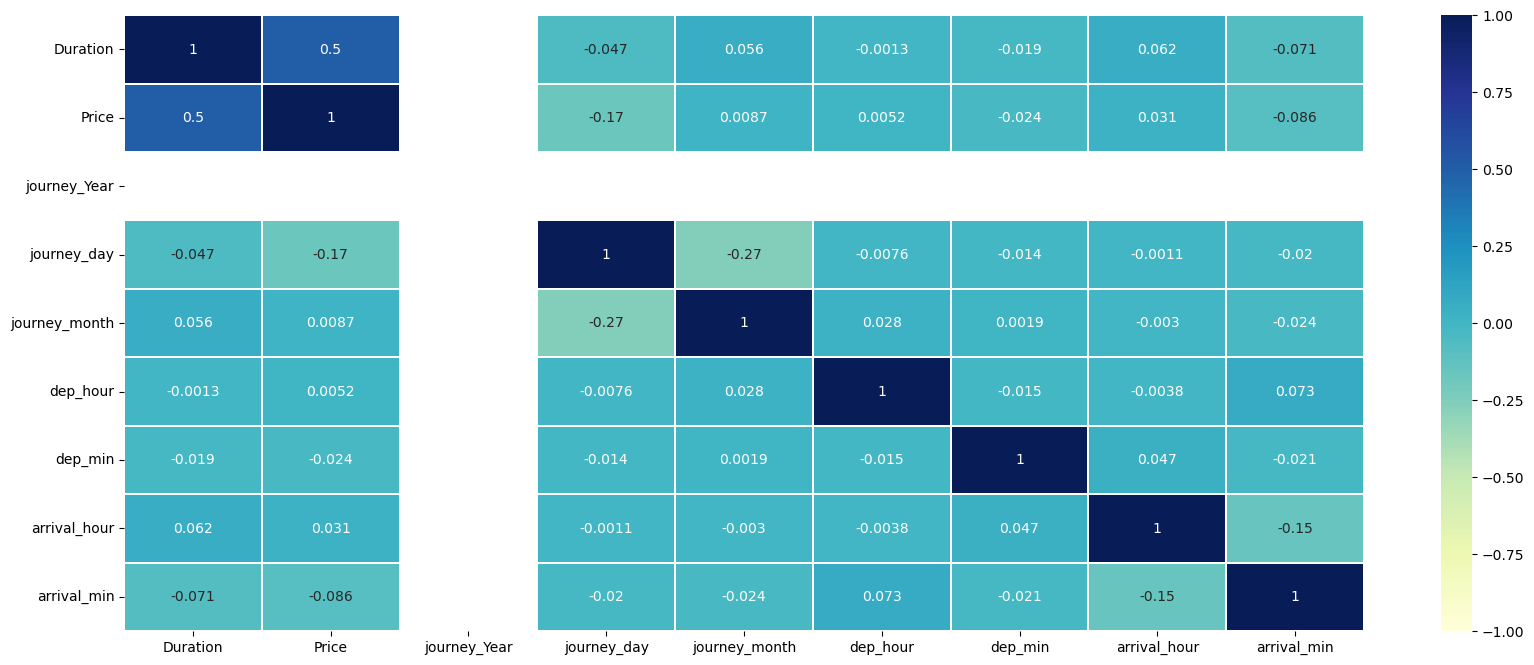

In [52]:
#checking corrilation between features
corrmatrix=train_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10462 non-null  object
 1   Source         10462 non-null  object
 2   Destination    10462 non-null  object
 3   Duration       10462 non-null  int64 
 4   Total_Stops    10462 non-null  object
 5   Price          10462 non-null  int64 
 6   journey_Year   10462 non-null  int64 
 7   journey_day    10462 non-null  int64 
 8   journey_month  10462 non-null  int64 
 9   dep_hour       10462 non-null  int64 
 10  dep_min        10462 non-null  int64 
 11  arrival_hour   10462 non-null  int64 
 12  arrival_min    10462 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# encoding

In [54]:
categorical_features=['Airline','Source','Destination','Total_Stops']

In [55]:
#Label encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [56]:
for column in categorical_features:
    train_data[column]=label_encoder.fit_transform(train_data[column])
train_data.head() 

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_Year,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,3,0,5,170,4,3897,2019,24,3,22,20,1,10
1,1,3,0,445,1,7662,2019,5,1,5,50,13,15
2,4,2,1,1140,1,13882,2019,6,9,9,25,4,25
3,3,3,0,325,0,6218,2019,5,12,18,5,23,30
4,3,0,5,285,0,13302,2019,3,1,16,50,21,35


In [57]:
for column in categorical_features:
    test_data[column]=label_encoder.fit_transform(test_data[column])
test_data.head() 

,Airline,Source,Destination,Duration,Total_Stops,journey_Year,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,4,2,1,655,0,2019,6,6,17,30,4,25
1,3,3,0,240,0,2019,5,12,6,20,10,20
2,4,2,1,1425,0,2019,21,5,19,15,19,0
3,6,2,1,780,0,2019,21,5,8,0,21,0
4,0,0,2,170,4,2019,24,6,23,55,2,45


In [58]:
train_data.shape

(10462, 13)

In [59]:
test_data.shape

(2645, 12)

In [60]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_Year', 'journey_day', 'journey_month', 'dep_hour', 'dep_min',
       'arrival_hour', 'arrival_min'],
      dtype='object')

In [61]:
test_data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'journey_Year', 'journey_day', 'journey_month', 'dep_hour', 'dep_min',
       'arrival_hour', 'arrival_min'],
      dtype='object')

In [62]:
#splitting data into dependent and independent columns

x=train_data.drop('Price',axis=1)
y=train_data['Price']

In [63]:
#scaling
#standard scaling
from sklearn import preprocessing
standadisation=preprocessing.StandardScaler()
x=standadisation.fit_transform(x)
# Coverting to Dataframe
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,10462.0,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04
mean,-7.001770e-16,4.436050e-16,-5.730510e-16,-2.243686e-16,1.495055e-15,0.0,-1.249664e-16,3.359534e-16,3.133181e-17,-2.361797e-16,1.559321e-16,6.363991e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,0.0,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.683676e+00,-1.646877e+00,-9.720121e-01,-1.247878e+00,-8.033367e-01,0.0,-1.095422e+00,-1.513956e+00,-2.178906e+00,-1.297115e+00,-1.952919e+00,-1.491880e+00
25%,-4.149159e-01,3.907899e-02,-9.720121e-01,-9.183232e-01,-8.033367e-01,0.0,-8.679221e-01,-8.462209e-01,-7.820028e-01,-1.031367e+00,-7.859251e-01,-8.883671e-01
50%,8.004029e-03,3.907899e-02,-2.967671e-01,-2.492267e-01,-8.033367e-01,0.0,-7.541722e-01,-1.784860e-01,-2.581641e-01,3.162457e-02,8.932044e-02,1.690205e-02
75%,8.004029e-03,8.820572e-01,3.784780e-01,5.596811e-01,1.392916e+00,0.0,9.520766e-01,1.553814e-01,9.641263e-01,8.288685e-01,8.186917e-01,6.204148e-01
max,2.968444e+00,1.725035e+00,2.404213e+00,4.454422e+00,1.392916e+00,0.0,1.634576e+00,2.158586e+00,1.837191e+00,1.626112e+00,1.402189e+00,1.827440e+00


In [64]:
#splitting as training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [65]:
#Fitting with the models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [66]:
#fitting models
models={'LinearRegressor':LinearRegression(),
        'LassoRegressor':Lasso(alpha=0.1),
        'RidgeRegressor':Ridge(alpha=1),
        'RandomForestRegressor':RandomForestRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SVR':SVR()
       }

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+' trained')

LinearRegressor trained
LassoRegressor trained
RidgeRegressor trained
RandomForestRegressor trained
DecisionTreeRegressor trained
SVR trained


In [67]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=[]
rmse=[]
mse=[]
mae=[]
#checking the scores for regressors
for name,model in models.items():
    y_pred=model.predict(x_test)
    rmse.append(mean_squared_error((y_test), (y_pred), squared=False))
    r2score.append(r2_score((y_test),(y_pred)))
    mse.append(mean_squared_error((y_test),(y_pred)))
    mae.append(mean_absolute_error((y_test),(y_pred)))

In [68]:
Models = ['Linear Regression','Lasso Regression','Ridge Regression','Randon Forest Regression','Decision Tree Regression',
          'Support Vector Regression']
model_performance = pd.DataFrame({
    'Model':Models,
    'R2_Score':r2score,
    'Mean_squared_error':mse,
    'Root_Mean_Squared_Error':rmse,
    'Mean_Absolute_error':mae
    })
model_performance

,Model,R2_Score,Mean_squared_error,Root_Mean_Squared_Error,Mean_Absolute_error
0,Linear Regression,0.419603,1.192858e+07,3453.778023,2500.661023
1,Lasso Regression,0.419608,1.192849e+07,3453.764168,2500.620808
2,Ridge Regression,0.419607,1.192850e+07,3453.765583,2500.627179
3,Randon Forest Regression,0.775400,4.616089e+06,2148.508584,1248.300820
4,Decision Tree Regression,0.638637,7.426906e+06,2725.234972,1476.871320
5,Support Vector Regression,0.032004,1.989468e+07,4460.345557,3438.494818


In [69]:
#X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,random_state=42,test_size=0.2)

rfr = RandomForestRegressor()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [70]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    
    print('RMSE :',mean_squared_error((test_labels), (predictions), squared=False))
    print('R2 :',r2_score((test_labels),(predictions)))
    print('MSE :',mean_squared_error((test_labels),(predictions)))
    print('MAE :',mean_absolute_error((test_labels),(predictions)))
    
    return accuracy

In [71]:
#fitting the base model
rfr.fit(x_train,y_train)

#Different scores from the base model before tuning
evaluate(rfr,x_test,y_test)

RMSE : 2123.381633913998
R2 : 0.7806223010535823
MSE : 4508749.563243279
MAE : 1248.7752889317862


86.11606008201852

In [72]:
#finding the best parameter with the help of RandomizesearchCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [73]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 50, 
                               cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [74]:
#Best parameters for our models is:
pprint(rf_random.best_params_)

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1800}


In [75]:
#Running the model with best parameters
rfrb = RandomForestRegressor(bootstrap= False,
 max_depth= 50,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 800)

rfrb.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=800)

In [76]:
#rerunning the model with best parameters
#rfb = rf_random.best_estimator_
evaluate(rfrb,x_test,y_test)

RMSE : 1968.4089359715533
R2 : 0.8114758378025344
MSE : 3874633.7392126624
MAE : 1229.6029741366483


85.92945753149448

random forest is giving good score

In [77]:
#scaling test data

In [78]:
X=test_data

In [79]:
#standard scaling
from sklearn import preprocessing
standadisation=preprocessing.StandardScaler()
X=standadisation.fit_transform(X)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.008716,0.030594,-0.293844,0.038653,-0.791246,0.0,-0.702811,0.131049,0.772098,0.267435,-1.366298,0.026232
1,-0.426286,0.873530,-0.976212,-0.789942,-0.791246,0.0,-0.819520,2.106117,-1.165138,-0.256540,-0.512126,-0.271549
2,0.008716,0.030594,-0.293844,1.576046,-0.791246,0.0,1.047819,-0.198129,1.124323,-0.518527,0.769131,-1.462674
3,0.878721,0.030594,-0.293844,0.288230,-0.791246,0.0,1.047819,-0.198129,-0.812914,-1.304489,1.053855,-1.462674
4,-1.731292,-1.655278,0.388524,-0.929705,1.429868,0.0,1.397945,0.131049,1.828772,1.577372,-1.651022,1.217357


In [86]:
Y_pred = rfr.predict(X)

In [87]:
Y_pred

array([10854.137     ,  4254.4       , 13652.44966667, ...,
       15900.66      , 14610.71      ,  7324.38      ])

In [88]:
result=pd.DataFrame({'price':Y_pred})

In [89]:
result.head()

,price
0,10854.137000
1,4254.400000
2,13652.449667
3,13344.781667
4,3728.050000


In [90]:
result.to_excel('result.xlsx',index=False)

successfully created  and predicted using random forest regressor
accuracy 86.11
finetuning makes no change.instead reduce the accuracy